In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision as vision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets.utils import download_url
import tarfile

In [3]:
ds=CIFAR10(root="data/",download=True,transform=transforms.ToTensor(),train=True)

Extracting data/cifar-10-python.tar.gz to data/


torch.Size([3, 32, 32])


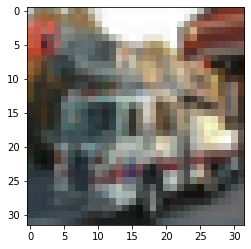

In [4]:
i,j=ds[900]
print(i.shape)
plt.imshow(i.permute(1,2,0))


In [5]:
j

9

In [6]:
dl=DataLoader(ds,batch_size=128,shuffle=True)

In [7]:
ds.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

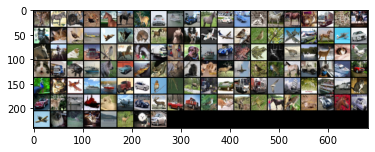

In [8]:
for i,j in dl:
    plt.imshow(make_grid(i,nrow=20).permute(1,2,0))
    break
    


# custom cnn model

In [59]:
def cnn(img,k):
    ri,ci=img.shape
    rk,ck=k.shape
    ro,co=ri-rk+1,ci-ck+1
    out=torch.zeros(ro,co)
    for i in range(ro):
        for j in range(co):
            out[i,j]=torch.sum(img[i:i+rk,j:j+ck])
    return out

In [60]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

In [61]:
cnn(sample_image, sample_kernel)

tensor([[15., 15., 15.],
        [ 9., 11., 16.],
        [10.,  7., 12.]])

# simple cnn

In [68]:
model=nn.Sequential(
    nn.Conv2d(3,8,stride=1,kernel_size=3,padding=1),    
    nn.MaxPool2d(2,2)
    
)

In [ ]:
for i,j in dl:
    print(i.shape)
    pred=model(i)
    print(pred.shape)
    break